<a href="https://colab.research.google.com/github/gg5d/Computational_Linear_Algebra/blob/main/HW_12_continuous_rv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homewok 12
## Continuous Random Variables

## Setup

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, gamma
from math import exp, log, pi
import sympy as sp

def exp_pdf(x, lam):
    return lam*exp(-lam*x) if x >= 0 else 0.0

def exp_cdf(x, lam):
    return 1.0 - exp(-lam*x) if x >= 0 else 0.0

def uniform_cdf(x, a, b):
    if x <= a: return 0.0
    if x >= b: return 1.0
    return (x-a)/(b-a)


## Question 1

**Statement.** Player batting average p is modeled as Beta(81, 219) based on observed hits/at-bats.

**Questions.**
1. Compute P(0.25 ≤ p ≤ 0.30).
2. Find the 90th percentile.
3. Plot the PDF and the CDF separately.

**Answers.**
1. P(0.25 ≤ p ≤ 0.30) = beta.cdf(0.30,81,219) − beta.cdf(0.25,81,219).
2. 90th percentile = beta.ppf(0.90,81,219).
3. See the two figures below (PDF, then CDF).

**Description of the answers.** Use the Beta CDF difference for the interval probability and Beta PPF (inverse CDF) for the percentile.


P(0.25<=p<=0.30)= 0.6579299143859291
q90= 0.3031434678975757


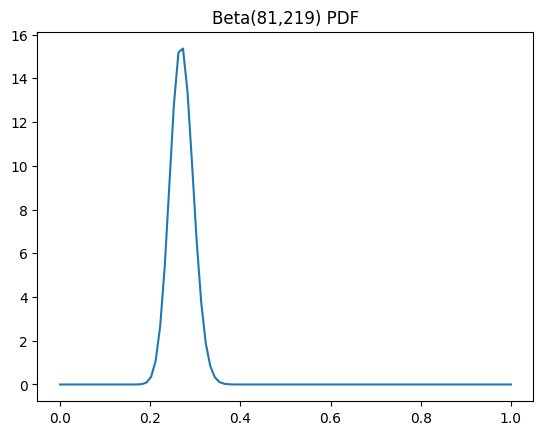

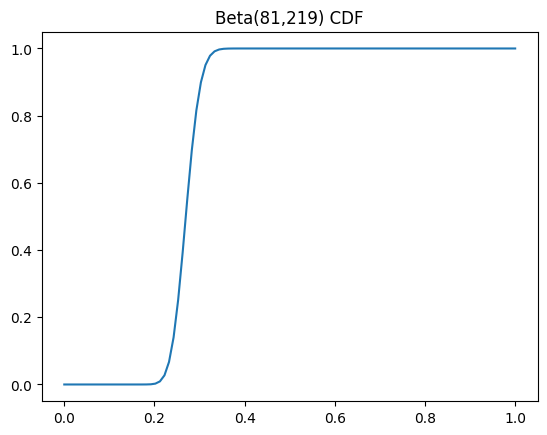

In [2]:

a,b=81,219
print('P(0.25<=p<=0.30)=', beta.cdf(0.30,a,b) - beta.cdf(0.25,a,b))
print('q90=', beta.ppf(0.90,a,b))
x=np.linspace(0,1,100)
plt.plot(x,beta.pdf(x,a,b)); plt.title('Beta(81,219) PDF'); plt.show()
plt.plot(x,beta.cdf(x,a,b)); plt.title('Beta(81,219) CDF'); plt.show()


## Question 2

**Statement.** Project completion proportion modeled as Beta(5, 2).

**Questions.**
1. Compute E[X].
2. Compute P(X < 0.6).

**Answers.**
1. E[X] = a/(a+b) = 5/7.
2. P(X < 0.6) = beta.cdf(0.6,5,2).

**Description of the answers.** The Beta mean is a/(a+b); the probability comes from the Beta CDF at 0.6.


In [3]:

a,b=5,2
print('E[X]=', a/(a+b))
print('P(X<0.6)=', beta.cdf(0.6,a,b))


E[X]= 0.7142857142857143
P(X<0.6)= 0.23328


## Question 3

**Statement.** Bolt diameters ~ Normal(10.0, 0.05^2) mm; specs are [9.9, 10.1] mm.

**Questions.**
1. Failure percentage.
2. Expected rejects in 10,000.
3. Density at 10.0 mm.
4. Plot the PDF and the CDF separately.

**Answers.**
1. Fail % = 100 × (norm.cdf(9.9,10,0.05) + 1 − norm.cdf(10.1,10,0.05)).
2. Rejects = 10,000 × failure probability.
3. f(10) = norm.pdf(10,10,0.05).
4. See the two figures below (PDF, then CDF).

**Description of the answers.** Use Normal CDF tails to get failure probability, multiply by 10,000 for expected rejects, and evaluate the PDF at 10.


Fail % 4.550026389635925
Rejects 455.0026389635925
f(10) 7.978845608028654


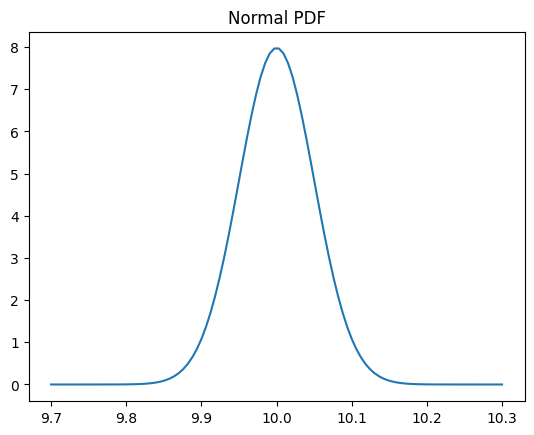

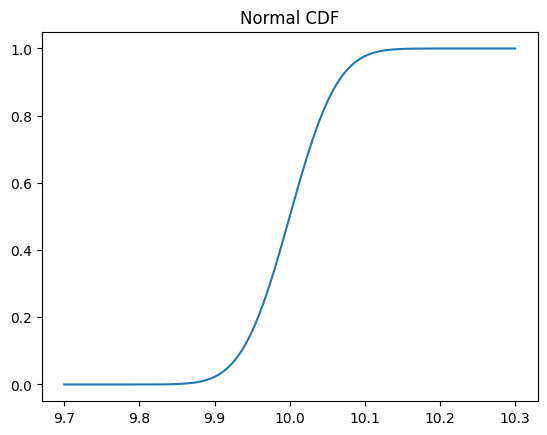

In [4]:

mu,sigma=10.0,0.05
p_fail=norm.cdf(9.9,mu,sigma)+(1-norm.cdf(10.1,mu,sigma))
print('Fail %', 100*p_fail)
print('Rejects', 10000*p_fail)
print('f(10)', norm.pdf(10,mu,sigma))
x=np.linspace(9.7,10.3,100)
plt.plot(x,norm.pdf(x,mu,sigma)); plt.title('Normal PDF'); plt.show()
plt.plot(x,norm.cdf(x,mu,sigma)); plt.title('Normal CDF'); plt.show()


## Question 4

**Statement.** SAT Math scores ~ Normal(520, 115^2).

**Questions.**
1. Top 10% cutoff.
2. P(500 ≤ X ≤ 650).
3. P(all 5 > 600).

**Answers.**
1. Cutoff = norm.ppf(0.90,520,115).
2. norm.cdf(650,520,115) − norm.cdf(500,520,115).
3. (1 − norm.cdf(600,520,115))^5.

**Description of the answers.** Use Normal PPF for the quantile, CDF difference for interval probability, and independence for all-5 probability.


In [5]:

mu,sigma=520,115
print('q90=', norm.ppf(0.90,mu,sigma))
print('P(500..650)=', norm.cdf(650,mu,sigma)-norm.cdf(500,mu,sigma))
p_above=1-norm.cdf(600,mu,sigma)
print('P(all5>600)=', p_above**5)


q90= 667.3784300376291
P(500..650)= 0.43988656685736965
P(all5>600)= 0.0008529407466131573


## Question 5

**Statement.** Annual rainfall ~ Gamma(shape=2, scale=3).

**Questions.**
1. P(X > 9).
2. P(3 ≤ X ≤ 6).
3. Median.
4. Mean.
5. Plot the PDF and the CDF separately.

**Answers.**
1. 1 − gamma.cdf(9,2,scale=3).
2. gamma.cdf(6,2,scale=3) − gamma.cdf(3,2,scale=3).
3. gamma.ppf(0.5,2,scale=3).
4. Mean = k·θ = 6.
5. See the two figures below (PDF, then CDF).

**Description of the answers.** Tail and interval probabilities use Gamma CDF; the median is the 0.5 quantile; mean is k·θ.


P(X>9)= 0.1991482734714558
P(3..6)= 0.3297530326330463
median= 5.035040970049984
mean= 6


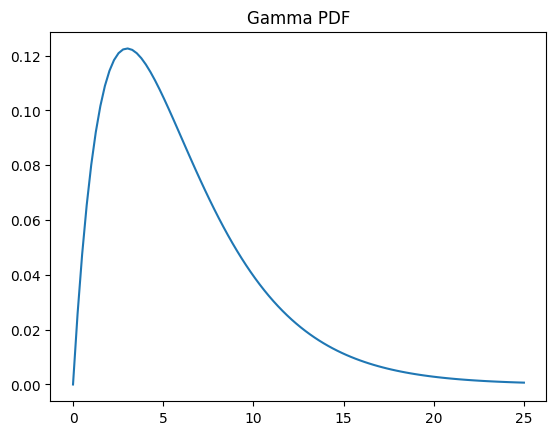

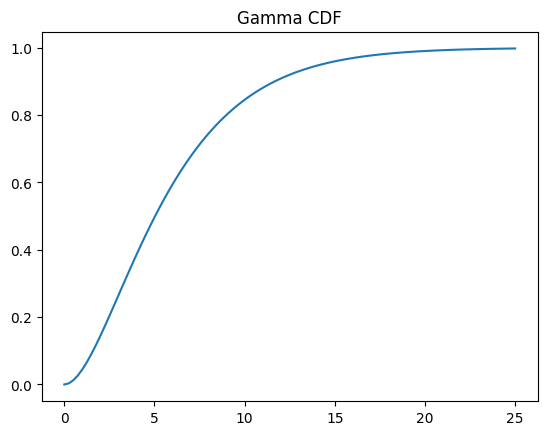

In [6]:

k,th=2,3
print('P(X>9)=',1-gamma.cdf(9,k,scale=th))
print('P(3..6)=',gamma.cdf(6,k,scale=th)-gamma.cdf(3,k,scale=th))
print('median=',gamma.ppf(0.5,k,scale=th))
print('mean=',k*th)
x=np.linspace(0,25,100)
plt.plot(x,gamma.pdf(x,k,scale=th)); plt.title('Gamma PDF'); plt.show()
plt.plot(x,gamma.cdf(x,k,scale=th)); plt.title('Gamma CDF'); plt.show()


## Question 6

**Statement.** Insurance claims ~ Gamma(shape=2.5, scale=4) (thousands).

**Questions.**
1. P(X > 15).
2. f(10).
3. 90th percentile.

**Answers.**
1. 1 − gamma.cdf(15,2.5,scale=4).
2. gamma.pdf(10,2.5,scale=4).
3. gamma.ppf(0.90,2.5,scale=4).

**Description of the answers.** Tail probability, density at a point, and percentile use Gamma functions.


In [7]:

k,th=2.5,4
print('P(X>15)=',1-gamma.cdf(15,k,scale=th))
print('f(10)=',gamma.pdf(10,k,scale=th))
print('q90=',gamma.ppf(0.90,k,scale=th))


P(X>15)= 0.18602983360286696
f(10)= 0.0610207606746937
q90= 18.472713799562246


## Question 7

**Statement.** Customer arrivals ~ Exponential(λ=4) minutes.

**Questions.**
1. P(T ≤ 0.5).
2. P(T > 2).
3. 90th percentile.
4. Plot the PDF and the CDF separately.

**Answers.**
1. 1 − exp(−4×0.5).
2. exp(−4×2).
3. −log(1−0.9)/4.
4. See the two figures below (PDF, then CDF).

**Description of the answers.** Exponential CDF gives probabilities; the inverse formula gives the percentile.


P(T<=0.5)= 0.8646647167633873
P(T>2)= 0.00033546262790251185
q90= 0.5756462732485115


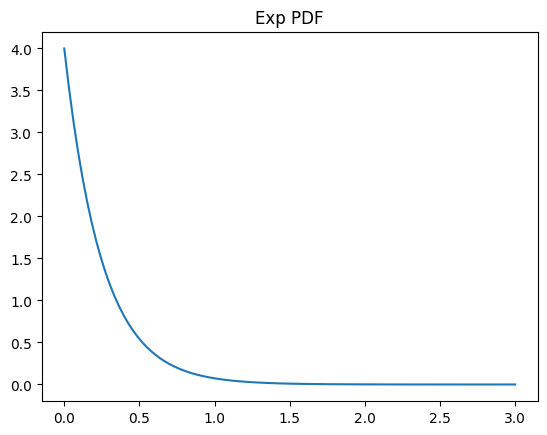

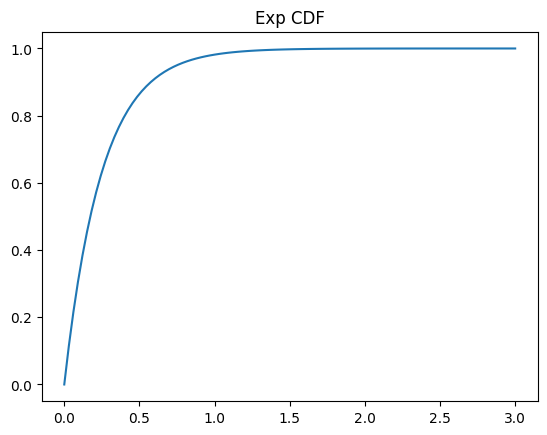

In [8]:

lam=4.0
print('P(T<=0.5)=',1-exp(-lam*0.5))
print('P(T>2)=',exp(-lam*2))
print('q90=',-log(1-0.9)/lam)
x=np.linspace(0,3,100)
pdf=[lam*exp(-lam*t) for t in x]
cdf=[1-exp(-lam*t) for t in x]
plt.plot(x,pdf); plt.title('Exp PDF'); plt.show()
plt.plot(x,cdf); plt.title('Exp CDF'); plt.show()


## Question 8

**Statement.** Radioactive decay waiting time ~ Exponential(λ=0.05) seconds.

**Questions.**
1. P(T > 30).
2. E[T].
3. f(20).
4. Plot the PDF and shade T<5 and T>25.

**Answers.**
1. exp(−0.05×30).
2. 1/0.05 = 20.
3. 0.05×exp(−0.05×20).
4. See shaded regions on the PDF plot.

**Description of the answers.** Use exponential tail and mean formulas; density at t=20 is λe^{−λt}; shading highlights short/long waits.


P(T > 30) = 0.22313016014842982
E[T] = 20.0
f(20) = 0.018393972058572117


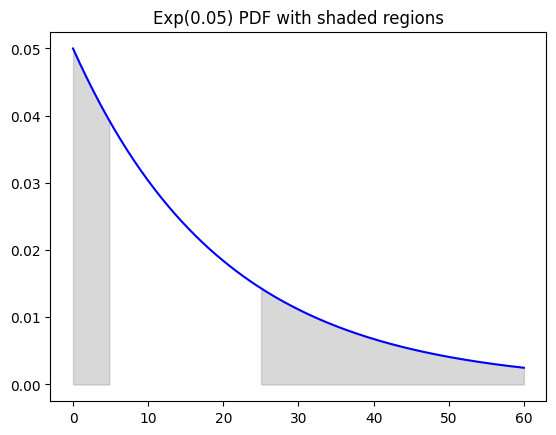

In [12]:

lam = 0.05

# Basic calculations
print('P(T > 30) =', exp(-lam * 30))
print('E[T] =', 1 / lam)
print('f(20) =', lam * exp(-lam * 20))

# Generate x values and PDF
x = np.linspace(0, 60, 200)
pdf = [lam * exp(-lam * t) for t in x]

# Plot the PDF
plt.plot(x, pdf, color='blue')

# Shade regions in gray
plt.fill_between(x, 0, pdf, where=(x <= 5), color='gray', alpha=0.3)
plt.fill_between(x, 0, pdf, where=(x >= 25), color='gray', alpha=0.3)

plt.title('Exp(0.05) PDF with shaded regions')
plt.show()



## Question 9

**Statement.** Manufacturing tolerance ~ Uniform(98.5, 101.5) cm.

**Questions.**
1. P(99.4 ≤ X ≤ 100.2).
2. 90th percentile.

**Answers.**
1. (100.2−99.4)/(101.5−98.5).
2. 98.5 + 0.9×(101.5−98.5).

**Description of the answers.** Uniform probability equals interval length over range; quantiles are linear: a + p(b−a).


In [13]:

a,b=98.5,101.5
print('P(99.4..100.2)=', (100.2-99.4)/(b-a))
print('q90=', a+0.9*(b-a))


P(99.4..100.2)= 0.2666666666666657
q90= 101.2


## Question 10

**Statement.** ER wait times ~ Uniform(10, 40) minutes.

**Questions.**
1. 90% threshold.
2. Plot the PDF and the CDF separately.

**Answers.**
1. 10 + 0.9×(40−10).
2. See the two figures below (PDF, then CDF).

**Description of the answers.** Uniform quantile is a + p(b−a); PDF is constant, CDF is piecewise-linear.


q90= 37.0


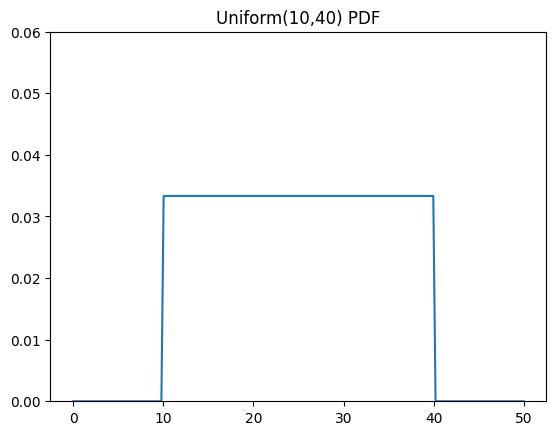

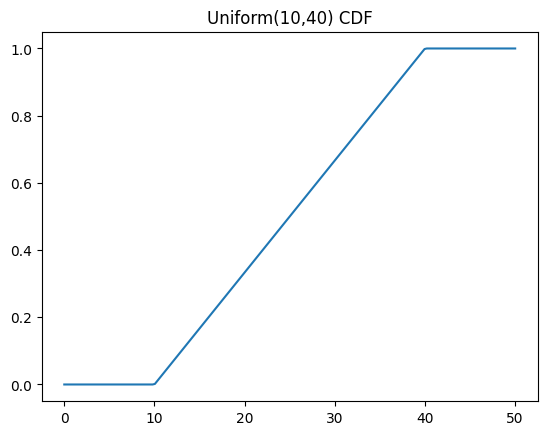

In [14]:

a,b=10,40
print('q90=', a+0.9*(b-a))
x=np.linspace(0,50,200)
pdf=[1/(b-a) if a<=xx<=b else 0 for xx in x]
cdf=[0 if xx<a else 1 if xx>b else (xx-a)/(b-a) for xx in x]
plt.plot(x,pdf); plt.title('Uniform(10,40) PDF'); plt.ylim(0,0.06); plt.show()
plt.plot(x,cdf); plt.title('Uniform(10,40) CDF'); plt.show()


## Question 11

**Statement.** Start times uniformly distributed over 4 hours (0 to 4 since 8:00).

**Questions.**
1. Plot the PDF and shade starts before 10:30 (≤2.5h).
2. P(start < 10:30).
3. P(9:30 to 10:45).

**Answers.**
1. PDF is constant 1/4 over [0,4], shaded for t ≤ 2.5.
2. 2.5/4.
3. (2.75−1.5)/4.

**Description of the answers.** Probabilities equal interval lengths divided by total window 4 hours.


P(start<10:30)= 0.625
P(9:30-10:45)= 0.3125


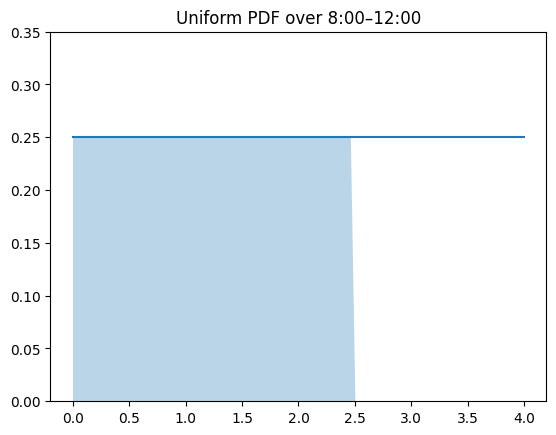

In [15]:

print('P(start<10:30)=', 2.5/4)
print('P(9:30-10:45)=', (2.75-1.5)/4)
x=np.linspace(0,4,100)
pdf=[1/4 for _ in x]
plt.plot(x,pdf)
shade=[1/4 if xx<=2.5 else 0 for xx in x]
plt.fill_between(x,0,shade,alpha=0.3)
plt.title('Uniform PDF over 8:00–12:00'); plt.ylim(0,0.35); plt.show()


## Question 12

**Statement.** f(x) = c√(1−x^2), −1 ≤ x ≤ 1.

**Questions.**
1. Find c.

**Answers.**
1. c = 2/π.

**Description of the answers.** Integral over [−1,1] equals π/2 (semicircle area); solve c·(π/2)=1.


In [16]:
from math import pi; print('c =', 2/pi)

c = 0.6366197723675814


## Question 13

**Statement.** f(x) = c√(1−x^2), 0 ≤ x ≤ 1.

**Questions.**
1. Find c.

**Answers.**
1. c = 4/π.

**Description of the answers.** Integral over [0,1] equals π/4 (quarter circle area); solve c·(π/4)=1.


In [17]:
from math import pi; print('c =', 4/pi)

c = 1.2732395447351628


## Question 14

**Statement.** Density f(x) = (1/2) sin x on [0, π].

**Questions.**
1. Overlay the analytic density on the histogram of simulated draws.
2. Estimate E[X] and compare to calculus.
3. Compute V[X].
4. Compute the mean absolute difference from π/2 and the IQR; compare simulation vs analytic.

**Answers.**
1. Histogram overlay with (1/2) sin x plotted on top.
2. E[X] by simulation, compared to the analytic value π/2.
3. Variance by simulation, compared to analytic π^2/4 − 2.
4. Mean absolute difference is defined as the average of |X − π/2|; IQR from sample and analytic π/3.

**Description of the answers.** Use the simple sampling function and basic numpy/matplotlib. The mean absolute difference is defined as the average of the absolute deviations from π/2: (1/n)·Σ|X_i − π/2|.


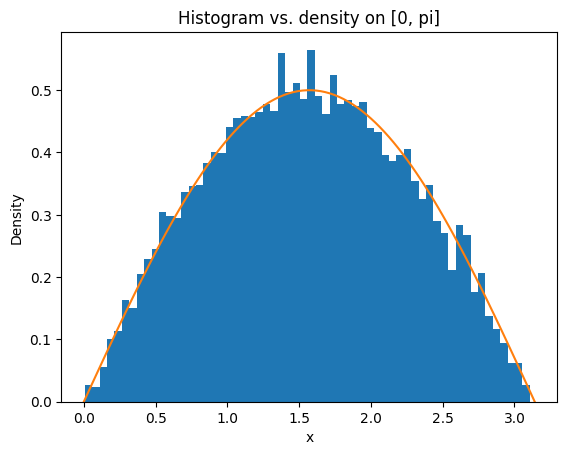

In [18]:

import numpy as np
np.random.seed(42)

def b_rvs(n):
    return np.arccos(-2*np.random.uniform(size=n) + 1)

x = b_rvs(10000)
xs = np.linspace(0, pi, 100)
pdf = [0.5*np.sin(t) for t in xs]
plt.hist(x, bins=60, density=True)
plt.plot(xs, pdf)
plt.title('Histogram vs. density on [0, pi]'); plt.xlabel('x'); plt.ylabel('Density')
plt.show()


In [19]:

# Simulation-based estimates and analytic comparisons (simple labels)
E_sim = float(np.mean(x))
Var_sim = float(np.var(x))
E_analytic = pi/2
Var_analytic = pi**2/4 - 2
# Mean absolute difference from pi/2
mean_abs_diff_sim = float(np.mean(np.abs(x - pi/2)))
# Interquartile range (IQR) from simulation and analytic (pi/3)
Q1_sim, Q3_sim = float(np.quantile(x, 0.25)), float(np.quantile(x, 0.75))
IQR_sim = Q3_sim - Q1_sim
IQR_analytic = pi/3
print('E_sim =', E_sim, '| E_analytic =', E_analytic)
print('Var_sim =', Var_sim, '| Var_analytic =', Var_analytic)
print('Mean absolute difference (from pi/2) =', mean_abs_diff_sim)
print('IQR_sim =', IQR_sim, '| IQR_analytic =', IQR_analytic)


E_sim = 1.55706791977944 | E_analytic = 1.5707963267948966
Var_sim = 0.4627776453270011 | Var_analytic = 0.4674011002723395
Mean absolute difference (from pi/2) = 0.5671472423221591
IQR_sim = 1.0327670756825837 | IQR_analytic = 1.0471975511965976
